## Alternus Vera
Dataset: Politifact/Liar-Liar dataset(https://www.politifact.com)

Description of the train TSV file format:

- Column 1: the ID of the statement ([ID].json)
- Column 2: the label.
- Column 3: the statement.
- Column 4: the subject(s).
- Column 5: the speaker.
- Column 6: the speaker's job title.
- Column 7: the state info.
- Column 8: the party affiliation.
- Column 9-13: the total credit history count, including the current statement.
  - 9: barely true counts.
  - 10: false counts.
  - 11: half true counts.
  - 12: mostly true counts.
  - 13: pants on fire counts.
- Column 14: the context (venue / location of the speech or statement).

------------------------
- Data Preparation
- Data exploration
- Stemming and tokenization
- Tf-Idf
- Sentiment Analysis
- LDA
- LDA Score calculation and topic inferance 
**Added tf-idf on bag of words, sentiment analysis, score calculation LDA (on bag of words and tf-idf) and comparision

-----------------------------
link to team repo:https://github.com/cpati/team-hvac

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import *
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df =pd.read_csv('../liar-liar_dataset/train.tsv', sep='\t')

In [3]:
df.head(10)

file        value                                          statement  \
0   2635.json        FALSE  Says the Annies List political group supports ...   
1  10540.json    half-true  When did the decline of coal start? It started...   
2    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json        FALSE  Health care reform legislation is likely to ma...   
4   9028.json    half-true  The economic turnaround started at the end of ...   
5  12465.json         TRUE  The Chicago Bears have had more starting quart...   
6   2342.json  barely-true  Jim Dunnam has not lived in the district he re...   
7    153.json    half-true  I'm the only person on this stage who has work...   
8   5602.json    half-true  However, it took $19.5 million in Oregon Lotte...   
9   9741.json  mostly-true  Says GOP primary opponents Glenn Grothman and ...   

                                       topic                    name  \
0                                   abortion            dwayne-bohac   
1         energy,history,job-accomplishments          scott-surovell   
2                             foreign-policy            barack-obama   
3                                health-care            blog-posting   
4                               economy,jobs           charlie-crist   
5                                  education               robin-vos   
6                       candidates-biography  republican-party-texas   
7                                     ethics            barack-obama   
8                                       jobs          oregon-lottery   
9  energy,message-machine-2014,voting-record           duey-stroebel   

                   occupation      state         party  barely true counts  \
0        State representative      Texas    republican                 0.0   
1              State delegate   Virginia      democrat                 0.0   
2                   President   Illinois      democrat                70.0   
3                         NaN        NaN          none                 7.0   
4                         NaN    Florida      democrat                15.0   
5  Wisconsin Assembly speaker  Wisconsin    republican                 0.0   
6                         NaN      Texas    republican                 3.0   
7                   President   Illinois      democrat                70.0   
8                         NaN        NaN  organization                 0.0   
9        State representative  Wisconsin    republican                 0.0   

   false counts  half true counts  mostly true counts  pants on fire counts  \
0           1.0               0.0                 0.0                   0.0   
1           0.0               1.0                 1.0                   0.0   
2          71.0             160.0               163.0                   9.0   
3          19.0               3.0                 5.0                  44.0   
4           9.0              20.0                19.0                   2.0   
5           3.0               2.0                 5.0                   1.0   
6           1.0               1.0                 3.0                   1.0   
7          71.0             160.0               163.0                   9.0   
8           0.0               1.0                 0.0                   1.0   
9           0.0               0.0                 1.0                   0.0   

                                   context   
0                                  a mailer  
1                           a floor speech.  
2                                    Denver  
3                            a news release  
4                       an interview on CNN  
5                 a an online opinion-piece  
6                          a press release.  
7  a Democratic debate in Philadelphia, Pa.  
8                                a website   
9                           an online video

In [4]:
df.shape

(10240, 14)

In [5]:
df.columns

Index(['file', 'value', 'statement', 'topic', 'name', 'occupation', 'state',
       'party', 'barely true counts', 'false counts', 'half true counts',
       'mostly true counts', 'pants on fire counts', 'context '],
      dtype='object')

##### Data exploration

In [6]:
df['state'].value_counts()

Texas                                                1009
Florida                                               997
Wisconsin                                             713
New York                                              657
Illinois                                              556
Ohio                                                  447
Georgia                                               426
Virginia                                              407
Rhode Island                                          369
New Jersey                                            241
Oregon                                                239
Massachusetts                                         206
Arizona                                               182
California                                            159
Washington, D.C.                                      120
Vermont                                                98
Pennsylvania                                           90
New Hampshire 

In [7]:
df['party'].unique()

array(['republican', 'democrat', 'none', 'organization', 'independent',
       'columnist', 'activist', 'talk-show-host', 'libertarian',
       'newsmaker', 'journalist', 'labor-leader', 'state-official',
       'business-leader', 'education-official', 'tea-party-member', nan,
       'green', 'liberal-party-canada', 'government-body', 'Moderate',
       'democratic-farmer-labor', 'ocean-state-tea-party-action',
       'constitution-party'], dtype=object)

In [8]:
df.loc[df['topic']=='health-care']

file        value  \
3       1123.json        FALSE   
14      8705.json  barely-true   
25     10215.json        FALSE   
85      2044.json    half-true   
92      2020.json  mostly-true   
165     4504.json  barely-true   
248    11772.json        FALSE   
314     8308.json  barely-true   
350     9031.json        FALSE   
389     5631.json        FALSE   
434     9434.json  barely-true   
442     5629.json        FALSE   
516     3097.json         TRUE   
541     8510.json   pants-fire   
582     2328.json    half-true   
612     1100.json  mostly-true   
619     7788.json    half-true   
707     2302.json    half-true   
731     1630.json  mostly-true   
768     1149.json        FALSE   
772     1509.json  mostly-true   
878    11576.json    half-true   
915    13424.json        FALSE   
929     4512.json        FALSE   
955      786.json        FALSE   
997     3712.json  mostly-true   
1001     262.json  barely-true   
1035    9984.json    half-true   
1038    5651.json        FALSE   
1046    4125.json        FALSE   
...           ...          ...   
9525    8926.json    half-true   
9534    8431.json        FALSE   
9553    1723.json  barely-true   
9569    8593.json        FALSE   
9581    1751.json        FALSE   
9594    5598.json        FALSE   
9673    8313.json    half-true   
9701    1300.json        FALSE   
9720    8512.json   pants-fire   
9727    1127.json    half-true   
9759    8459.json  barely-true   
9776    4465.json  barely-true   
9798     730.json    half-true   
9804    1205.json        FALSE   
9817    1256.json         TRUE   
9843     155.json        FALSE   
9856    1023.json        FALSE   
9872    1166.json  barely-true   
9875    2303.json    half-true   
9882    3680.json  mostly-true   
9896    8330.json  mostly-true   
9954    3070.json        FALSE   
9975    3762.json    half-true   
9985    1281.json         TRUE   
10000   1536.json  mostly-true   
10005   1176.json         TRUE   
10061   1126.json   pants-fire   
10122   8627.json    half-true   
10207   6178.json        FALSE   
10214   4216.json        FALSE   

                                               statement        topic  \
3      Health care reform legislation is likely to ma...  health-care   
14     Most of the (Affordable Care Act) has already ...  health-care   
25                 I dont know who (Jonathan Gruber) is.  health-care   
85     In Rick Perrys Texas, we import nurses ... fro...  health-care   
92     The insurance commissioner cant do squat about...  health-care   
165    Says Rick Perry wrote a letter supporting Hill...  health-care   
248    We now have driven (health care) costs down to...  health-care   
314    The American people support defunding Obamacar...  health-care   
350    Most young Americans right now, theyre not cov...  health-care   
389    Says Congressman Bill Pascrell voted to remove...  health-care   
434    Jason Carter supports using Georgia tax dollar...  health-care   
442    New federal projections estimate that the heal...  health-care   
516    Texas leads the nation in the percentage of re...  health-care   
541    What we said was, you can keep (your plan) if ...  health-care   
582    Charlie Crist has six different positions on O...  health-care   
612    14,000 Americans . . . lose their health insur...  health-care   
619    The Affordable Care Act is bringing the cost o...  health-care   
707    We spend more money on health care per capita ...  health-care   
731    The American people will be appalled to learn ...  health-care   
768    We spend twice as much per capita on health ca...  health-care   
772    One of the most recent polls said 75 percent o...  health-care   
878    The United States is the only major country on...  health-care   
915    Prior to Obamacare here in Wisconsin, 95 perce...  health-care   
929    If we had been on Obamacare and a bureaucrat w...  health-care   
955    Barack Obama's plan calls for "mandates and fi...  health-care   
997   

In [9]:
df.isnull().sum()

file                       0
value                      0
statement                  0
topic                      2
name                       2
occupation              2897
state                   2208
party                      2
barely true counts         2
false counts               2
half true counts           2
mostly true counts         2
pants on fire counts       2
context                  102
dtype: int64

### Data Cleaning
    Tokenizing: converting a document to its atomic elements.
    Stopping: removing meaningless words.
    Stemming: merging words that are equivalent in meaning.

In [10]:
df1 =df.drop(columns=['file','value' ,'barely true counts', 'false counts',
       'half true counts', 'mostly true counts', 'pants on fire counts',])

In [11]:
print (df1)

                                               statement  \
0      Says the Annies List political group supports ...   
1      When did the decline of coal start? It started...   
2      Hillary Clinton agrees with John McCain "by vo...   
3      Health care reform legislation is likely to ma...   
4      The economic turnaround started at the end of ...   
5      The Chicago Bears have had more starting quart...   
6      Jim Dunnam has not lived in the district he re...   
7      I'm the only person on this stage who has work...   
8      However, it took $19.5 million in Oregon Lotte...   
9      Says GOP primary opponents Glenn Grothman and ...   
10     For the first time in history, the share of th...   
11     Since 2000, nearly 12 million Americans have s...   
12     When Mitt Romney was governor of Massachusetts...   
13     The economy bled $24 billion due to the govern...   
14     Most of the (Affordable Care Act) has already ...   
15     In this last election in November

In [12]:
raw =df1[['statement']]
raw[:5]
final=raw.values.T.tolist()
print (len(final[0]))

10240


In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vidhsharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
## porter stemmer
def textProcessing(doc):
    process = re.sub('[^a-zA-Z]', ' ',doc) 
    process = process.lower()
    process = process.split()
    ps = PorterStemmer()
    process = [ps.stem(word) for word in process if not word in set(stopwords.words('english'))]
    process = ' '.join(process)
    return process

In [15]:
print('original document: ')
words = []
for word in final:
    words.append(word)
print (words)



original document: 
[['Says the Annies List political group supports third-trimester abortions on demand.', 'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.', 'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."', 'Health care reform legislation is likely to mandate free sex change surgeries.', 'The economic turnaround started at the end of my term.', 'The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.', 'Jim Dunnam has not lived in the district he represents for years now.', "I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate.", 'However, it took $19.5 million in Oregon Lottery funds for the Port of Newport to eventually land the 

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vidhsharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
result =[]
for i in final[0]:
    result.append(textProcessing(i))
print (result)

['say anni list polit group support third trimest abort demand', 'declin coal start start natur ga took start begin presid georg w bush administr', 'hillari clinton agre john mccain vote give georg bush benefit doubt iran', 'health care reform legisl like mandat free sex chang surgeri', 'econom turnaround start end term', 'chicago bear start quarterback last year total number tenur uw faculti fire last two decad', 'jim dunnam live district repres year', 'person stage work activ last year pass along russ feingold toughest ethic reform sinc waterg', 'howev took million oregon lotteri fund port newport eventu land new noaa marin oper center pacif', 'say gop primari oppon glenn grothman joe leibham cast compromis vote cost million higher electr cost', 'first time histori share nation popular vote margin smaller latino vote margin', 'sinc nearli million american slip middl class poverti', 'mitt romney governor massachusett didnt slow rate growth govern actual cut', 'economi bled billion due

### N grams using count vectorization

In [64]:
from sklearn.feature_extraction.text import CountVectorizer 

In [68]:
for i in df['statement']:
    vectorizer = CountVectorizer(ngram_range=(1,6))
    analyzer = vectorizer.build_analyzer()
    print (analyzer(i))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['for', 'the', 'hour', 'after', 'the', 'jan', '14', 'debate', 'debra', 'medina', 'was', 'the', 'no', 'search', 'on', 'google', 'and', 'for', 'the', 'remainder', 'of', 'that', 'night', 'no', 'for the', 'the hour', 'hour after', 'after the', 'the jan', 'jan 14', '14 debate', 'debate debra', 'debra medina', 'medina was', 'was the', 'the no', 'no search', 'search on', 'on google', 'google and', 'and for', 'for the', 'the remainder', 'remainder of', 'of that', 'that night', 'night no', 'for the hour', 'the hour after', 'hour after the', 'after the jan', 'the jan 14', 'jan 14 debate', '14 debate debra', 'debate debra medina', 'debra medina was', 'medina was the', 'was the no', 'the no search', 'no search on', 'search on google', 'on google and', 'google and for', 'and for the', 'for the remainder', 'the remainder of', 'remainder of that', 'of that night', 'that night no', 'for the hour after', 'the hour after the', 'hour after the jan', 'after the jan 14', 'the jan 14 debate', 'jan 14 debat

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### tokenization the words

In [18]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [19]:
final=[]
for i in result:
    tokens = tokenizer.tokenize(i)
    final.append(tokens)
print (final)



[['say', 'anni', 'list', 'polit', 'group', 'support', 'third', 'trimest', 'abort', 'demand'], ['declin', 'coal', 'start', 'start', 'natur', 'ga', 'took', 'start', 'begin', 'presid', 'georg', 'w', 'bush', 'administr'], ['hillari', 'clinton', 'agre', 'john', 'mccain', 'vote', 'give', 'georg', 'bush', 'benefit', 'doubt', 'iran'], ['health', 'care', 'reform', 'legisl', 'like', 'mandat', 'free', 'sex', 'chang', 'surgeri'], ['econom', 'turnaround', 'start', 'end', 'term'], ['chicago', 'bear', 'start', 'quarterback', 'last', 'year', 'total', 'number', 'tenur', 'uw', 'faculti', 'fire', 'last', 'two', 'decad'], ['jim', 'dunnam', 'live', 'district', 'repres', 'year'], ['person', 'stage', 'work', 'activ', 'last', 'year', 'pass', 'along', 'russ', 'feingold', 'toughest', 'ethic', 'reform', 'sinc', 'waterg'], ['howev', 'took', 'million', 'oregon', 'lotteri', 'fund', 'port', 'newport', 'eventu', 'land', 'new', 'noaa', 'marin', 'oper', 'center', 'pacif'], ['say', 'gop', 'primari', 'oppon', 'glenn', 'g

### adding all the sentence token's in one list

In [20]:
import itertools
flat=itertools.chain.from_iterable(final)
text = list(flat)


In [21]:
from gensim import corpora, models

In [22]:
dictionary = corpora.Dictionary(final)
print (dictionary)

Dictionary(7696 unique tokens: ['abort', 'anni', 'demand', 'group', 'list']...)


In [23]:
import numpy as np
final=np.asarray(final)
raw1 = np.concatenate(final).ravel().tolist()
raw1

['say',
 'anni',
 'list',
 'polit',
 'group',
 'support',
 'third',
 'trimest',
 'abort',
 'demand',
 'declin',
 'coal',
 'start',
 'start',
 'natur',
 'ga',
 'took',
 'start',
 'begin',
 'presid',
 'georg',
 'w',
 'bush',
 'administr',
 'hillari',
 'clinton',
 'agre',
 'john',
 'mccain',
 'vote',
 'give',
 'georg',
 'bush',
 'benefit',
 'doubt',
 'iran',
 'health',
 'care',
 'reform',
 'legisl',
 'like',
 'mandat',
 'free',
 'sex',
 'chang',
 'surgeri',
 'econom',
 'turnaround',
 'start',
 'end',
 'term',
 'chicago',
 'bear',
 'start',
 'quarterback',
 'last',
 'year',
 'total',
 'number',
 'tenur',
 'uw',
 'faculti',
 'fire',
 'last',
 'two',
 'decad',
 'jim',
 'dunnam',
 'live',
 'district',
 'repres',
 'year',
 'person',
 'stage',
 'work',
 'activ',
 'last',
 'year',
 'pass',
 'along',
 'russ',
 'feingold',
 'toughest',
 'ethic',
 'reform',
 'sinc',
 'waterg',
 'howev',
 'took',
 'million',
 'oregon',
 'lotteri',
 'fund',
 'port',
 'newport',
 'eventu',
 'land',
 'new',
 'noaa',
 '

### Bag of words
to measure the frequency 

In [24]:
dictionary.filter_extremes(no_below=20, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(result) for result in final]
print (bow_corpus[50])



[(4, 1), (34, 1), (90, 1), (91, 1), (93, 1), (275, 1), (276, 1), (277, 1), (278, 1)]


### TF-IDF on Bag of words
to measure the relevance of the words

In [25]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]


In [26]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.35904583507755133),
 (1, 0.43205352296640565),
 (2, 0.490320729707899),
 (3, 0.4306640399228395),
 (4, 0.12019203984807553),
 (5, 0.2874852011836854),
 (6, 0.40179104146231087)]


### LDA Model on bag of words

In [27]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import numpy as np
np.random.seed(2018)

In [28]:
lda_model = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics=10, id2word = dictionary, passes=2)

In [29]:
print (lda_model)

LdaModel(num_terms=968, num_topics=10, decay=0.5, chunksize=2000)


In [30]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.126*"percent" + 0.041*"tax" + 0.027*"rate" + 0.024*"year" + 0.017*"incom" + 0.017*"pay" + 0.015*"american" + 0.015*"sinc" + 0.014*"top" + 0.013*"say"
Topic: 1 
Words: 0.049*"job" + 0.025*"state" + 0.022*"peopl" + 0.017*"creat" + 0.016*"get" + 0.016*"offic" + 0.015*"new" + 0.013*"health" + 0.013*"insur" + 0.013*"busi"
Topic: 2 
Words: 0.053*"vote" + 0.031*"say" + 0.026*"bill" + 0.022*"democrat" + 0.021*"support" + 0.018*"u" + 0.018*"john" + 0.016*"allow" + 0.016*"even" + 0.016*"mccain"
Topic: 3 
Words: 0.033*"say" + 0.025*"illeg" + 0.025*"immigr" + 0.024*"texa" + 0.023*"trump" + 0.022*"state" + 0.021*"one" + 0.020*"wage" + 0.020*"donald" + 0.016*"law"
Topic: 4 
Words: 0.053*"year" + 0.025*"state" + 0.023*"million" + 0.018*"peopl" + 0.018*"two" + 0.018*"got" + 0.016*"last" + 0.015*"work" + 0.013*"wisconsin" + 0.013*"everi"
Topic: 5 
Words: 0.051*"presid" + 0.039*"obama" + 0.024*"ever" + 0.021*"say" + 0.021*"state" + 0.019*"time" + 0.018*"bush" + 0.017*"debt" + 0.015*"f

10 topics:
- tax rate
- job
- voting for bill 
- immigration
- President Obama
- school fund
- tax on health care

#### Score calculation

In [31]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.47892361879348755	 
Topic: 0.053*"vote" + 0.031*"say" + 0.026*"bill" + 0.022*"democrat" + 0.021*"support" + 0.018*"u" + 0.018*"john" + 0.016*"allow" + 0.016*"even" + 0.016*"mccain"

Score: 0.19224534928798676	 
Topic: 0.056*"say" + 0.022*"republican" + 0.020*"budget" + 0.020*"secur" + 0.020*"state" + 0.018*"billion" + 0.017*"cut" + 0.016*"rick" + 0.016*"clinton" + 0.016*"democrat"

Score: 0.17535533010959625	 
Topic: 0.051*"presid" + 0.039*"obama" + 0.024*"ever" + 0.021*"say" + 0.021*"state" + 0.019*"time" + 0.018*"bush" + 0.017*"debt" + 0.015*"first" + 0.015*"unit"

Score: 0.1073104590177536	 
Topic: 0.045*"say" + 0.034*"school" + 0.034*"fund" + 0.028*"public" + 0.027*"romney" + 0.025*"state" + 0.023*"student" + 0.020*"educ" + 0.020*"mitt" + 0.015*"would"


### LDA Model on tf -idf

In [32]:
lda_model_tfidf  = gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=10, id2word = dictionary, passes=2)

In [33]:
print (lda_model)

LdaModel(num_terms=968, num_topics=10, decay=0.5, chunksize=2000)


In [34]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.126*"percent" + 0.041*"tax" + 0.027*"rate" + 0.024*"year" + 0.017*"incom" + 0.017*"pay" + 0.015*"american" + 0.015*"sinc" + 0.014*"top" + 0.013*"say"
Topic: 1 
Words: 0.049*"job" + 0.025*"state" + 0.022*"peopl" + 0.017*"creat" + 0.016*"get" + 0.016*"offic" + 0.015*"new" + 0.013*"health" + 0.013*"insur" + 0.013*"busi"
Topic: 2 
Words: 0.053*"vote" + 0.031*"say" + 0.026*"bill" + 0.022*"democrat" + 0.021*"support" + 0.018*"u" + 0.018*"john" + 0.016*"allow" + 0.016*"even" + 0.016*"mccain"
Topic: 3 
Words: 0.033*"say" + 0.025*"illeg" + 0.025*"immigr" + 0.024*"texa" + 0.023*"trump" + 0.022*"state" + 0.021*"one" + 0.020*"wage" + 0.020*"donald" + 0.016*"law"
Topic: 4 
Words: 0.053*"year" + 0.025*"state" + 0.023*"million" + 0.018*"peopl" + 0.018*"two" + 0.018*"got" + 0.016*"last" + 0.015*"work" + 0.013*"wisconsin" + 0.013*"everi"
Topic: 5 
Words: 0.051*"presid" + 0.039*"obama" + 0.024*"ever" + 0.021*"say" + 0.021*"state" + 0.019*"time" + 0.018*"bush" + 0.017*"debt" + 0.015*"f

10 topics:
- tax
- sex
- wage
- college 
- train
- job
- health care
- Donald Trump
- oil tax

#### Score calculation

In [35]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))




Score: 0.5462357401847839	 
Topic: 0.024*"health" + 0.023*"care" + 0.018*"insur" + 0.013*"compani" + 0.012*"walker" + 0.012*"job" + 0.012*"scott" + 0.012*"oil" + 0.012*"ga" + 0.011*"employe"

Score: 0.296714723110199	 
Topic: 0.014*"largest" + 0.013*"food" + 0.013*"john" + 0.012*"democrat" + 0.011*"board" + 0.011*"presid" + 0.011*"say" + 0.010*"member" + 0.010*"despit" + 0.010*"vote"

Score: 0.1031959056854248	 
Topic: 0.020*"job" + 0.016*"state" + 0.014*"percent" + 0.013*"wisconsin" + 0.012*"new" + 0.012*"measur" + 0.012*"california" + 0.012*"year" + 0.011*"florida" + 0.011*"lose"


### Sentiment Analysis

polarity: negative, neutral, positive, compound
polarity annotations in output: 
- negative - neg
- neutral - neu
- positive - pos
- compound - compound

In [36]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [37]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    #print("{}{}".format(sentence, str(score)))
    return score

In [38]:
polarity=[]
for i in df['statement']:
    result = (sentiment_analyzer_scores(i))
    polarity.append(result)
    print (i)
    print (result)
    print ("")
    

Says the Annies List political group supports third-trimester abortions on demand.
{'neg': 0.115, 'neu': 0.692, 'pos': 0.192, 'compound': 0.25}

When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.
{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.3612}

Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
{'neg': 0.107, 'neu': 0.687, 'pos': 0.206, 'compound': 0.3182}

Health care reform legislation is likely to mandate free sex change surgeries.
{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.7579}

The economic turnaround started at the end of my term.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.
{'neg': 0.12, 'neu': 0.836, 'pos': 0.043, 'compound': -0.5106}

Jim Dunnam

I haven't missed a vote since 1993.
{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.2235}

Says the treasurers office has saved $37 million in management costs for the oversight of public investments.
{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4939}

Says Georgia will send more state money per child to state charter schools and that budget cuts are not applied to those charter schools.
{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'compound': -0.296}

Jorge Elorza wants to impose a municipal income tax.
{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}

The Supreme Court cant overrule the other two branchesof government.
{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.5574}

Roughly 25% of RI has a criminal record
{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'compound': -0.5267}

Nathan Deal cut the HOPE scholarship program so that literally 100,000 Georgians will not be able to go to college or get technical training that they so badly needed to raise -- yo

Social Security is indeed a Ponzi scheme.
{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.34}

Says Scott Walker brags a lot about having an independent agency investigate police shootings. Of course, he didnt fund it.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

What the Arizona law does is make a state crime out of something that already is... a federal crime.
{'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.7906}

When the country was founded, Congress had exactly the same attitude about the sanctity of Christmas celebrations that a 7-Eleven does today: Yeah, were open.
{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.296}

In Miami-Dade County, we spend at our school system over $20 million every year educating recent immigrants.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The omnibus bill has only $3.8 billion in earmarks.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Trump proposed enacting the largest tax increase in American his


Deregulation of the states telecommunications industry will create 50,000 jobs in Wisconsin.
{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2732}

We admit about 100,000 permanent immigrants from the Middle East every year.
{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.2023}

Says paid family leave is a program that is standard in all but five nations around the world.
{'neg': 0.064, 'neu': 0.936, 'pos': 0.0, 'compound': -0.0258}

Nearly 14,000 Wisconsinites have lost their job since Governor Walker and the Republicans took over in January.
{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound': -0.3182}

Says in the last 20 years, the French have not stood by the United States on foreign policy.
{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.4215}

For the average middle-class family, your taxes today are lower than when I took office.
{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'compound': -0.296}

There's more than 100,000 people working at the Department of Agricu

Says she condemned violence at a campaign stop in Arizona in March.
{'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.8481}

According to the most recent report, Wisconsins high school graduation rates are also up again -- to third best in the country.
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6369}

In Iran in 1979, the extremists hijacked the broad-based popular revolution against the Shah and established a brutal theocracy.
{'neg': 0.179, 'neu': 0.699, 'pos': 0.122, 'compound': -0.3182}

On immigration reform, Marco Rubio all along has been saying, We have to have border security first and then he gets on Spanish TV, he ends up saying, No, no. That will never get in the way.
{'neg': 0.108, 'neu': 0.833, 'pos': 0.059, 'compound': -0.25}

Dem-controlled Ohio House voted to change the process, to create objective criteria, to modify the Constitution ... to take politics out of the efforts to draw legislative boundaries.
{'neg': 0.0, 'neu': 0.928, 'pos': 0.072, 'compo

Attorney General Eric Holder is involved in the dismissal of the criminal charges against the New Black Panther Party for voter intimidation
{'neg': 0.286, 'neu': 0.621, 'pos': 0.093, 'compound': -0.6808}

Says the state share of Texas public education spending increased 82 percent over the past decade, reaching $20 billion in 2009.
{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'compound': 0.6249}

In Richmond, Va., theres more moving vans coming in than going out.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Gov. Chris Christie owes the state money for amenities like extra Gorgonzola cheese for his staff on these trips.
{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.3612}

I'm glad for the wording of it (an ethics report on corporate-sponsored Congressional trips) because clearly the wording exonerates me.
{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.8074}

Paul Ryans Medicare plan could raise future retirees costs more than $6,000.
{'neg': 0.0, 'neu': 1.0, 'pos


Oregon today has 100,000 more jobs than it did when I was elected.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says Cory Gardner championed an eight-year crusade to outlaw birth control here in Colorado.
{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.296}

There are actually only 30 countries that practice birthright citizenship.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In the U.S. Senate, Barack Obama "has not reached across party lines to get anything significant done."
{'neg': 0.184, 'neu': 0.723, 'pos': 0.093, 'compound': -0.1911}

Says the Koch brothers funded the fight to let flood insurance premiums soar ... Now theyre spending millions to buy a Senate seat for Bill Cassidy so he can fight for them.
{'neg': 0.152, 'neu': 0.848, 'pos': 0.0, 'compound': -0.6369}

Former President Bill Clinton and his Clinton Health Access Initiative (CHAI) distributed watered-down HIV/AIDSdrugs to patients in sub-Saharan Africa.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0


Sometime in the next decade, there will be more Latinos in the state of Texas than there are Anglos. That will happen sometime in the next five to eight to ten years.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Millennials will be 75 percent of the workforce in the next 10 years.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Over 60 percent of the provisional ballots cast in [the 2012] election were disqualified because those folks were not duly registered as voters.
{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.4215}

The Fourth Amendment was what we fought the Revolution over. John Adams said it was the spark that led to our war for independence.
{'neg': 0.213, 'neu': 0.722, 'pos': 0.065, 'compound': -0.6486}

The vast majority of people in this country are keeping their (health insurance) plan.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The Democratic health care law added 12 years of solvency to Medicare.
{'neg': 0.0, 'neu': 0.775, 'pos': 

{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.5574}

Property taxes are now 18% higher than when(Mark Sharpe)first took office.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The minimum number of infrastructure (needs) in Atlanta is $900 million.
{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.0772}

The firefighter and police officer pension system is not headed for bankruptcy, far from it. Thats because New Jersey first responders -- fire fighters and police officers -- have never missed making payments to the retirement system.
{'neg': 0.091, 'neu': 0.861, 'pos': 0.048, 'compound': -0.1808}

The truth was revealed there in that report that showed there was no unlawful or unethical activity on my part.
{'neg': 0.222, 'neu': 0.685, 'pos': 0.093, 'compound': -0.4939}

Says Donald Trump said he intends to open up additional areas off the coast to oil drilling during the campaign.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Here are the stats: Per popu

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sen. Kay Bailey Hutchison's "concession speech came with less than 20 percent of the precincts having been counted.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

I think we came down here (to Florida) one time ... but we weren't actively fundraising here.
{'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compound': -0.3491}

Canadian-born Ted Cruz has had a double passport.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says Holly Turner failed to vote in five straight Republican primaries.
{'neg': 0.232, 'neu': 0.634, 'pos': 0.134, 'compound': -0.34}

The White House budget plan will bring domestic discretionary spending to its lowest share of our economy since Dwight Eisenhower was president.
{'neg': 0.105, 'neu': 0.806, 'pos': 0.089, 'compound': -0.1027}

The California governor says yes to poisoning more children with mercury and aluminum in vaccines.
{'neg': 0.195, 'neu': 0.667, 'pos': 0.138, 'compound': -0.2732}

Says 

Says the acting chief of the IRS said he and the majority of IRS employees would rather stay with his current health plan than switch to Obamacare.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Florida is now the No. 1 state in the country for automobile accident fraud.
{'neg': 0.476, 'neu': 0.524, 'pos': 0.0, 'compound': -0.8442}

When I took office last year we faced historic budget deficits of $6 billion here in Virginia. And we closed those deficits by cutting spending.
{'neg': 0.061, 'neu': 0.939, 'pos': 0.0, 'compound': -0.128}

All University of Texas student-athletes get an iPad.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

There was no surge in 501(c)(4) applications in 2010.
{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.296}

Says 10 days after Hurricane Katrina, this chamber passed two separate bills amounting to $60 billion. It has been nearly two months since we had Superstorm Sandy, and nothing has passed.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 

Says last year the graduation rate for our combined six-district footprint jumped 5.5 percent.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

President Obama's own director of national intelligence, Admiral Blair, put it this way: 'High-value information came from interrogations in which those methods were used and provided a deeper understanding of the al-Qaida organization that was attacking this country.'
{'neg': 0.071, 'neu': 0.802, 'pos': 0.127, 'compound': 0.34}

When he (Donald Trump) asked Florida to have casino gambling, we said no.
{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'compound': -0.296}

Milwaukee police use deadly force at a rate that is among the lowest in the country.
{'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'compound': -0.3818}

When Sen. Edwards ran in 2004, he wasn't for universal health care. I'm glad he is now.
{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.7351}

Says Barbara Buono voted to raise her own pay 40 percent.
{'neg': 0.123, 'neu': 0.87


In Flint, Mich., the pipes still havent been replaced. The water is still poisoned.
{'neg': 0.198, 'neu': 0.802, 'pos': 0.0, 'compound': -0.4939}

Here in Virginia, we have the opportunity to become the first state on the East Coast to explore for and produce oil and natural gas offshore.
{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.6486}

Donald Trumps decision to skip the Fox News/Google debate in Des Moines is near unprecedented.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The McCain campaign is roughly in the position where Vice President Gore was running against President Bush one week before the election of 2000.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

We've won twice as many states. We've won a greater share of the popular vote.
{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'compound': 0.9313}

Health care reform: Everything about it is going to raise costs, raise taxes and lower the quality of health care.
{'neg': 0.086, 'neu': 0.664, 'pos': 0.25


Because of Barack Obama 32 million new people will have healthcare.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Right now, we only keep 50 percent of Georgia Techs graduates.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Most funding for tuberculosis research (is) provided by the U.S. National Institutes for Health.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

An amazing 5,400 jobs were lost in the first 12 months of the (smoking) bans implementation in Ohios hospitality industry alone.
{'neg': 0.165, 'neu': 0.69, 'pos': 0.146, 'compound': 0.128}

Says Mexico doesnt have birthright citizenship, and Americans are the only ones to have it.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

After Massachusetts passed a mandatory health insurance law their mortality rate went down...it saved lives.
{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.4767}

The Orange County, Florida, school board voted to make it impossible for a student to receive a g

{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.2263}

Says Newt Gingrich said Spanish is the language of the ghetto.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

When I came into office, our vaccination rate in Texas was 65 percent. When I left two weeks ago, it was 95 percent.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Central Health is the only hospital district in Texas that spends taxpayer dollars on abortions.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The decision to remove Chick-fil-A from Emory University was based solely on student feedback.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Women who have miscarriages could be investigated by police under legislation supported by Republican state Senate candidate Rick Gudex.
{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.3182}

Businesses will be required to certify to the IRS under penalty of perjury that Obamacare was not a motivating factor for cutting staff.
{'neg': 0.

{'neg': 0.26, 'neu': 0.74, 'pos': 0.0, 'compound': -0.8834}

Says Donald Trump supports the Wall Street bailout.
{'neg': 0.141, 'neu': 0.606, 'pos': 0.253, 'compound': 0.2732}

Georgia is one of three states that effectively have no regulations whatsoever on lobbyists giving to legislators.
{'neg': 0.102, 'neu': 0.651, 'pos': 0.247, 'compound': 0.4767}

Live cats have holes drilled into their skulls, posts put into their heads and coils put into their eyes, and some have had their ears cut off or are intentionally deafened or starved at UW-Madison labs that do research to improve hearing in humans.
{'neg': 0.115, 'neu': 0.827, 'pos': 0.058, 'compound': -0.4215}

Says Ron Johnson is benefiting from several super PACs, I am not.
{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.5994}

One international flight a day in a wide-bodied jet ... one flight daily generates $150 million a year and approximately 2,300 jobs.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

I didnt raise

A new manufacturing plant is slated to create about 3,000 jobs in central and northeast Georgia and create about a $3 billion infusion into the economy.
{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.4939}

Since Gov. Nathan Deal office in 2011, the states rainy day fund has grown by 643 percent.
{'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'compound': -0.0772}

Says President Barack Obama built this $16 trillion debt.
{'neg': 0.238, 'neu': 0.762, 'pos': 0.0, 'compound': -0.3612}

The IRS is going to be in charge of our health care.
{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4939}

Im also the only lieutenant governor to not take a security detail.
{'neg': 0.169, 'neu': 0.831, 'pos': 0.0, 'compound': -0.2584}

You've got a building in the Cayman Islands that supposedly houses 12,000 corporations. That's either the biggest building or the biggest tax scam on record.
{'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'compound': -0.5719}

Says Obama is only president in history who h

He admits he still doesn't know how to use a computer, can't send an e-mail.
{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.296}

If todays economy was rebounding at the rate of the Reagan recovery, it would have created the equivalent of 25 million new jobs and raised federal revenue by $800 billion a year.
{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.25}

Social Security doesnt contribute a penny to the deficit.
{'neg': 0.243, 'neu': 0.541, 'pos': 0.216, 'compound': -0.0772}

Says state Sens. Greg Evers, Nancy Detert and Charles Dean got a failing grade from conservatives.
{'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'compound': -0.5106}

When I was mayor of New York City, I encouraged adoptions. Adoptions went up 65-70 percent. Abortions went down 16 percent.
{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.3612}

The average faculty member at UW-Madison brings in close to a quarter million dollars a year in grant money.
{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, '


Says Mike Gallaghers plan would cut Social Security benefits for two-thirds of seniors.
{'neg': 0.123, 'neu': 0.585, 'pos': 0.292, 'compound': 0.4404}

Alaska Sens. Lisa Murkowski and Mark Begich vote as much as 80 percent of the time together.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Texas #2 in nation for new gun purchases, behind California.
{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.34}

Productivity has risen 18 percent ...yet wages have stayed flat... There are 5-million more people in poverty here in our country than there were in 2000.
{'neg': 0.125, 'neu': 0.875, 'pos': 0.0, 'compound': -0.552}

The president gave the (auto) companies to the UAW.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The richest 80 people in the world own more wealth than the bottom half of the global population.
{'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.7841}

In the 1970s, the swine flu broke out . . . under another Democrat, President Jimmy Carter.
{


Russia has more diversity in its governmental representation than we do in Texas.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says Russ Feingold wanted to get money out of politics. Now hes profiting from that same dark money.
{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3818}

DeWine took $1.9 million from big banks, supported legislation that helped Bernie Madoff make millions and protected predatory lenders while families lost their homes.
{'neg': 0.081, 'neu': 0.737, 'pos': 0.182, 'compound': 0.4404}

Says Bobby Jindals parents used his birthright citizenship to become Americans, making him an anchor baby.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The U.S. would gainrevenue by cutting personal income tax rates in half and ending tax breaks.
{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.128}

Says Detroit dumping a bunch of sewage in Lake Erie causes big problems for Ohio.
{'neg': 0.294, 'neu': 0.706, 'pos': 0.0, 'compound': -0.6124}

Und

{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4939}

Connecticuts take on slot machines is 25 cents on the dollar. And the states take on table games: zero.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Bill Lynch told three lies in ten seconds
{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.4215}

Says Milwaukee County Sheriff David Clarke has deputies collecting overtime while sitting passively in chairs watching courthouse security personnel work.
{'neg': 0.077, 'neu': 0.814, 'pos': 0.109, 'compound': 0.1779}

Independent analysts say (Donald Trump) would add $30 trillion to the national debt.
{'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'compound': -0.3612}

Sen. Obama has been to Iraq once.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Unemployment has been on the rise throughout Wisconsin as Paul Ryan stepped up his advocacy of immigration increases.
{'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.4404}

Says Donald Trump was one of the peop

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says with Jon Corzine, its the first time, I think, in history where a former Senator has been subpoenaed to testify before his former colleagues.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says Donald Trump brings in hundreds of foreign workers to replace Americans.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Tuition-free public universities and colleges are just a pipe dream. False. They were both free up until the Vietnam War.
{'neg': 0.155, 'neu': 0.635, 'pos': 0.21, 'compound': 0.1027}

Candidate Bill Byrne used campaign funds for work on his personal car.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Pat Toomey thinks corporations shouldnt pay any taxes.
{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.0762}

A construction worker whos making $50 or $60 grand a year shouldnt be paying higher tax rates than the guy whos making $50 million a year. And thats how its working right now.
{'neg'

Bernie Sanders opposes the death penalty, and Hillary Clinton supports it.
{'neg': 0.397, 'neu': 0.46, 'pos': 0.144, 'compound': -0.6597}

Palin supports "aerial hunting of wolves and other wildlife."
{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}

Women make only 78 percent of what men make for the same job.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

It has been 269 days since (Hillary) Clinton has held a press conference.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says he was the first local official to endorse Barack Obama
{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.3182}

About $4.89 billion in one-time money was used to balance the current state general revenue fund budget.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says that under President John F. Kennedy, government took up 27 percent of the economy, and today it consumes 37 percent.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

President Obama has stopped us

New Hampshire has lost more jobs to China than any other state.
{'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'compound': -0.3182}

SaysGov. John Kasich incorrectly claimed Ohios economy was 38th in the nation when he took office. We were sixth in the nation in terms of economic job growth.
{'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'compound': 0.3818}

(Birmingham, Ala.) is the cradle of the civil rights movement.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Because of Gov. Scott Walkers budgeting, a greater percentage of general fund tax dollars is going to pay off debt than ever before in our history.
{'neg': 0.137, 'neu': 0.775, 'pos': 0.088, 'compound': -0.1027}

When I took office, the deficit was nearly 10 percent of our economy. Today, its approaching 3 percent.
{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.4019}

Were 49th in the United States in new businesses created.
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.5859}

I was banned from talking about B


Georgia lawmakers balanced the budget without raising taxes on residents.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Defends his vote to push retirement age to 70 by saying he is for a process that would not be fully implemented until around the turn of the century.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

President Obama . . . wants to mandate circumcision.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The president has given 1,100 special waivers to his friends for Obamacare.
{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.7003}

Says that three of these five Republicans -- Ben Westlund, Rob Patridge, Max Williams, Lane Shetterly, Lynn Lundquist -- later became Democrats.
{'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.5574}

The crime decline in the United States would be fairly small if it wasn't for the crime decline in New York City.
{'neg': 0.243, 'neu': 0.66, 'pos': 0.097, 'compound': -0.6369}

Proposed cuts in the House farm b


Says $38 billion in spending cuts in federal budget compromise is less than $1 billion in real cuts.
{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.5267}

Eighty-five percent of governments running right now. Only 15 percent of government spending is shut down.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The EPA has tried to define a puddle or a drainage ditch on your farm to be navigable waters and thus subject to massive environmental regulations.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says public education will get more money in 2012-13 though lawmakers cut $15 billion in overall spending.
{'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.2732}

We have completely turned our economy around.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Theres only three countries in the entire world wheretheres no paid vacation by law, we happen to be one of them.
{'neg': 0.099, 'neu': 0.901, 'pos': 0.0, 'compound': -0.296}

An organized crime synd

{'neg': 0.404, 'neu': 0.596, 'pos': 0.0, 'compound': -0.8591}

My recommended budget includes $1 billion in new state funding for education.
{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.2023}

The "pay-as-you-go law ... was a big reason why we had record surpluses in the 1990s."
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In 1998, nearly half of Floridas fourth-graders were functionally illiterate. Today, 72% of them can read.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In the late 1980s, the U.S. was nearly the lowest-taxed nation in the world, and a quarter century later were nearly the highest.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Proposed federal regulations would affect every streetsign in the country
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

There are 100 members of the U.S. Senate. Fifty-seven of them, including Russ Feingold, are lawyers. There are zero manufacturers and one accountant.
{'neg': 0.0, 'neu': 1.0, 'pos

{'neg': 0.151, 'neu': 0.771, 'pos': 0.077, 'compound': -0.3818}

The Katy Freeway, or Interstate 10 west of Houston, is the widest freeway in the world, with up to 26 lanes, including frontage road lanes.
{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'compound': 0.1027}

Today gasoline hit $6 a gallon in Florida.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The majority of Austinites rent the places they live.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The health care bill "dumps 15 to 18 million low-income Americans into a Medicaid program that none of us want to be a part of because 50 percent of doctors won't see new patients."
{'neg': 0.109, 'neu': 0.803, 'pos': 0.089, 'compound': 0.0716}

In Massachusetts under Mitt Romney, unemployment went down, household incomes went up, and the state saw its credit rating upgraded.
{'neg': 0.123, 'neu': 0.766, 'pos': 0.111, 'compound': -0.0772}

This is the most generous country in the world when it comes to immigration. There

Says Romney wants to add $2 trillion to the defense budget that the military hasnt asked for.
{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.128}

U.S. Rep. Phil Gingrey wants public schools to teach women to stay in their place.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

As the election tracker FiveThirtyEight has reported, whoever wins Pennsylvania will be our next President.
{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.5719}

Says U.S. House opponent Michael Williams does not live in and has never voted in the congressional district hes seeking to represent.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

No one in American history has moved from a June 16 announcement to a May 26 winning of a majority. Trumps achievement is remarkable.
{'neg': 0.081, 'neu': 0.662, 'pos': 0.257, 'compound': 0.7003}

The Interior Department is in charge of salmon while theyre in fresh water, but the Commerce Department handles them when theyre in saltwater.
{'neg'

Our high school graduation rate is the highest on record.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Say Ohio Reps. Marcia Fudge, Marcy Kaptur and Dennis Kucinich are socialists who are openly serving in the U.S. Congress.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Were not engaged in nation-building in Afghanistan.
{'neg': 0.273, 'neu': 0.727, 'pos': 0.0, 'compound': -0.3089}

Says the Defense Department shrink-wrapped $10.8 billion in American money, loaded it on 175 pallets and put it on a transport plane to Iraq where they passed out $100 bills and no one has any receipts.
{'neg': 0.06, 'neu': 0.899, 'pos': 0.041, 'compound': -0.1779}

Says he stood up to his own party by voting against the budget to stop runaway government spending.
{'neg': 0.105, 'neu': 0.766, 'pos': 0.129, 'compound': 0.128}

Democrats very much are in the pocket of the NRA.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Floridas proposed amendment for medical marijuana would allo


Connie Macks only real job in the real world was as events coordinator for Hooters!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Denies that he said the Obama campaign "played the race card."
{'neg': 0.197, 'neu': 0.634, 'pos': 0.169, 'compound': -0.1027}

Paul Ryans already spent millions to try and permanently derail Brad (Schneider)s progressive, energized campaign.
{'neg': 0.119, 'neu': 0.703, 'pos': 0.178, 'compound': 0.2732}

$50,000. Thats what every child owes today because Washington politicians have run up a huge spending tab and left our kids the bill.
{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'compound': 0.3182}

The United States is the only major country that taxes its own exports.
{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.4215}

As Secretary of State, Hillary Clinton laundered money to Bill Clinton through Laureate Education, while Bill Clinton was an honorary chairman of the group.
{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'compound': 0.34}

The bl


For four days in Denver, the Democrats were afraid to use the words 'Islamic terrorism.'
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

A former Clinton administration official and other economists agree that if you keep extending these temporary unemployment benefits, youre just going to extend joblessness even more.
{'neg': 0.094, 'neu': 0.684, 'pos': 0.221, 'compound': 0.4404}

In the past decade, K-12 funding has grown six times faster than the rate of enrollment.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Cities like Seattle have decided to ban food carts.
{'neg': 0.275, 'neu': 0.534, 'pos': 0.191, 'compound': -0.2732}

Creating 25 jobs in Umatilla County has the same impact as 500 jobs in the metro region.
{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.296}

Will (HB2)threaten federal funding for public schools under Title IX? No, according to a federal court which has looked at a similar issue.
{'neg': 0.099, 'neu': 0.901, 'pos': 0.0, 'compound': -0.

{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'compound': -0.3182}

I've seen (life) from the factory floor when I was working the graveyard shift ...and I'd be ankle-deep in water at the Murray Ohio bicycle plant where I was running a machine that was so loud I couldn't hear myself yell if I wanted to.
{'neg': 0.053, 'neu': 0.947, 'pos': 0.0, 'compound': -0.296}

Says Dwight Holton has never set foot in an Oregon courtroom.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

State Medicaid expansion will save our treasury $1 billion over the next eight years.
{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.6124}

The U.S. unemployment rate has been massaged, its been doctored.
{'neg': 0.244, 'neu': 0.756, 'pos': 0.0, 'compound': -0.4404}

If you printed a $1 bill for the entirety of the $14.1 trillion national debt, the resulting pile of money would weigh more than 136 aircraft carriers.
{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.3612}

Eighty out of 82 counties in O

{'neg': 0.062, 'neu': 0.702, 'pos': 0.236, 'compound': 0.6941}

Says Texas has one state inspector for every 4,500 oil and gas wells.
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.25}

The Obama administration has been raising taxes.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Boeing is building a brand new 747 Air Force One for future presidents, but costs are out of control, more than $4 billion. Cancel order!
{'neg': 0.108, 'neu': 0.892, 'pos': 0.0, 'compound': -0.4199}

Peter DeFazio will sneak in a 1 percent tax on all banking transactions.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

If you threw a barbecue yesterday for the Memorial weekend, it was 29 percent more expensive than last year because Barack Obamas policies have led to groceries going up 29 percent.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says Catherine Cortez Masto failed Nevada rape victims. While attorney general, thousands of rape kits were never sent for DNA analysis.

Says crime is rising in Manchester and has gone up 19 percent under Mayor Ted Gatsas.
{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.5423}

I am the only candidate that has endorsed Bernie Sanders for President. In PA, Ive got Bernies back.
{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.25}

John McCain "took on the drug industry."
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

War for the soul of the TxDems: 57% of Dem incumbents for Tx House LOST their primary.
{'neg': 0.296, 'neu': 0.597, 'pos': 0.107, 'compound': -0.6633}

Says Mitt Romney flip-flopped on abortion.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

On recusing herself from cases after receiving a campaign contribution
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Almost 88,000 United States service members are still missing and unaccounted for, dating back to World War II.
{'neg': 0.258, 'neu': 0.635, 'pos': 0.107, 'compound': -0.5542}

Says judges are using Shariah law in Dear

John McCain accused Barack Obama "of letting infants die."
{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.296}

Sherrod Brown voted six times to raise his own pay.
{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'compound': -0.1027}

The size of our federal government has more than doubled since the year 2000.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The latest unemployment numbers have shown that nearly 315,000 Americans have simply given up hope when it comes to finding a job.
{'neg': 0.117, 'neu': 0.766, 'pos': 0.117, 'compound': 0.0}

The changes to Georgias tax and fee structure is an overall tax cut.
{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'compound': -0.2732}

Says Obama wants to redesign the American flag "to better offer our enemies hope and love."
{'neg': 0.145, 'neu': 0.591, 'pos': 0.264, 'compound': 0.3818}

Gun homicide is down 49 percent in the past 12 years.
{'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'compound': -0.34}

Says he voted for disaster relief an


When I become the nominee, the Democratic nominee, I will be the only pro-choice candidate on the ballot.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

While the smoking rate nationally has fallen, more than 18 percent of Georgians still light up.
{'neg': 0.143, 'neu': 0.857, 'pos': 0.0, 'compound': -0.3612}

While 38 percent of (firearms) dealers that were inspected in 2011 were noncompliant with federal law, only 0.05 percent of inspected dealers had their licenses revoked.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

John McCain's tax plan will give no reduction "for 100-million American families."
{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.296}

I think [a little] less than half of the people in our prisons are in there for less than a year. ... We have people who are check kiters and dont pay child support and we are locking them up in the state pen.
{'neg': 0.052, 'neu': 0.918, 'pos': 0.03, 'compound': -0.2411}

Rob Portmans plan to tax, slash and


Says Democratic opponent is too Republican to stand up for us.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says that when he was governor of Utah, he worked with the state Legislature to create a flat tax that cut income taxes by 30 percent.
{'neg': 0.077, 'neu': 0.846, 'pos': 0.077, 'compound': 0.0}

The health care plan for members of Congress "is no better than the janitor who cleans their offices."
{'neg': 0.094, 'neu': 0.644, 'pos': 0.262, 'compound': 0.5994}

On most things except witch trials, Virginia will always have been first.
{'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'compound': -0.4144}

Because of union rules, cooks helpers moved into DMV jobs they were not trained for
{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.2732}

Lady Gaga announced she would cover her face until Trump gets fired from office.
{'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.5574}

Dan Webster would force victims of rape and incest to bear their attackers child.
{'neg': 0.4

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The 90 percent statistic ofsupporting background checks, thats been debunked.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Bob Barr has changed his position on the Defense of Marriage Act over the years.
{'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.128}

Youth unemployment is through the roof.
{'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'compound': -0.4404}

Says 55 percent of council members have come from area where only 10 percent of Austinites live.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The transportation sales tax would cost the average consumer an estimated $112 a year.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Twenty million Americans are out of work.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Says that Sherrod Brown is an Obama rubber stamp for supporting the job-killing cap and trade plan.
{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4404}

Says Marco Rub

{'neg': 0.0, 'neu': 0.553, 'pos': 0.447, 'compound': 0.836}

Says The idea of one casino per tribe is a false one.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The 2013 immigration bill expanded President Obamas ability to bring Syrian refugees to this country without mandating any meaningful background checks.
{'neg': 0.084, 'neu': 0.817, 'pos': 0.099, 'compound': 0.0869}

Suzanne Bonamici was the only no vote on a 2009 bill cracking down on drunk drivers.
{'neg': 0.261, 'neu': 0.739, 'pos': 0.0, 'compound': -0.5574}

Regarding her State Department email practices, my predecessors did the same thing.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

We were promised (the stimulus) would provide 'green jobs' for Americans, but 80% of the $2 billion they spent on alternative energy went to purchase wind turbines built in China!
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.5707}

Says the reasoning behind Portlands high water and sewer rates is all kinds of pet p

Says Charlie Crist was pro-life, pro-gun and vehemently anti-tax.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

We were the No. 1 job creator in America in February and we are now the No. 4 job creator in the last year.
{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.5267}

Up to half of all Americans have a pre-existing condition.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

A Republican budget proposal would have Wisconsin have the weakest standards for who can be a teacher in the classroom in the country.
{'neg': 0.142, 'neu': 0.858, 'pos': 0.0, 'compound': -0.5106}

Defensive medicine costs Georgia up to $14 billion a year.
{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.0258}

You are prohibited from walking into the Capitol with a gun, but you can go after the County Commission or the School Board.
{'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'compound': -0.1779}

Of all the illegals in America, more than half come through Arizona.
{'neg': 0.0, 'neu': 

Recently though, the media has reported on thousands of illegal voters here in the commonwealth.
{'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.5574}

Stopped by Smiley Cookie to pick up some great cookies for the family, along with Rudy.
{'neg': 0.088, 'neu': 0.599, 'pos': 0.313, 'compound': 0.7096}

Mike Trainor...still owes $250,000 to the state.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The Supreme Courts views are radically out of step with public opinion regarding its decision to legalize same-sex marriage nationwide.
{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.5574}

When it comes to the state deficit, Wisconsin is proportionally in as much trouble as the State of California.
{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.6597}

Eighty percent of the net new jobs created in the state of Texas since 2009 went to the foreign-born.
{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.25}

Mayor Fung wants to punish our childrens education by 

In [39]:
range(len(polarity))

range(0, 10240)

In [40]:
negative=[]
positive=[]
neutral=[]
compound=[]
size = len(polarity)
k=0
while k < len(polarity):
    negative.append(polarity[k].get('neg'))
    neutral.append(polarity[k].get('neu'))
    positive.append(polarity[k].get('pos'))
    compound.append(polarity[k].get('compound'))
    k=k+1

In [41]:
df['negative']= negative
df['positive']=positive
df['neutral']= neutral
df['compound']=compound

In [42]:
df.columns

Index(['file', 'value', 'statement', 'topic', 'name', 'occupation', 'state',
       'party', 'barely true counts', 'false counts', 'half true counts',
       'mostly true counts', 'pants on fire counts', 'context ', 'negative',
       'positive', 'neutral', 'compound'],
      dtype='object')

In [43]:
df.head(10)


file        value                                          statement  \
0   2635.json        FALSE  Says the Annies List political group supports ...   
1  10540.json    half-true  When did the decline of coal start? It started...   
2    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json        FALSE  Health care reform legislation is likely to ma...   
4   9028.json    half-true  The economic turnaround started at the end of ...   
5  12465.json         TRUE  The Chicago Bears have had more starting quart...   
6   2342.json  barely-true  Jim Dunnam has not lived in the district he re...   
7    153.json    half-true  I'm the only person on this stage who has work...   
8   5602.json    half-true  However, it took $19.5 million in Oregon Lotte...   
9   9741.json  mostly-true  Says GOP primary opponents Glenn Grothman and ...   

                                       topic                    name  \
0                                   abortion            dwayne-bohac   
1         energy,history,job-accomplishments          scott-surovell   
2                             foreign-policy            barack-obama   
3                                health-care            blog-posting   
4                               economy,jobs           charlie-crist   
5                                  education               robin-vos   
6                       candidates-biography  republican-party-texas   
7                                     ethics            barack-obama   
8                                       jobs          oregon-lottery   
9  energy,message-machine-2014,voting-record           duey-stroebel   

                   occupation      state         party  barely true counts  \
0        State representative      Texas    republican                 0.0   
1              State delegate   Virginia      democrat                 0.0   
2                   President   Illinois      democrat                70.0   
3                         NaN        NaN          none                 7.0   
4                         NaN    Florida      democrat                15.0   
5  Wisconsin Assembly speaker  Wisconsin    republican                 0.0   
6                         NaN      Texas    republican                 3.0   
7                   President   Illinois      democrat                70.0   
8                         NaN        NaN  organization                 0.0   
9        State representative  Wisconsin    republican                 0.0   

   false counts  half true counts  mostly true counts  pants on fire counts  \
0           1.0               0.0                 0.0                   0.0   
1           0.0               1.0                 1.0                   0.0   
2          71.0             160.0               163.0                   9.0   
3          19.0               3.0                 5.0                  44.0   
4           9.0              20.0                19.0                   2.0   
5           3.0               2.0                 5.0                   1.0   
6           1.0               1.0                 3.0                   1.0   
7          71.0             160.0               163.0                   9.0   
8           0.0               1.0                 0.0                   1.0   
9           0.0               0.0                 1.0                   0.0   

                                   context   negative  positive  neutral  \
0                                  a mailer     0.115     0.192    0.692   
1                           a floor speech.     0.000     0.098    0.902   
2                                    Denver     0.107     0.206    0.687   
3                            a news release     0.000     0.394    0.606   
4                       an interview on CNN     0.000     0.000    1.000   
5                 a an online opinion-piece     0.120     0.043    0.836   
6                          a press release.     0.000     0.000

#### Final Sentiment

In [44]:
df1 = pd.concat([df['positive'] ,df['negative'],df['compound'],df['neutral'] ], axis=1, join='outer')

print (df1.head(10))
#df1 =pd.DataFrame(np.array(list1).reshape(4,10240))
#print (df1.head())

   positive  negative  compound  neutral
0     0.192     0.115    0.2500    0.692
1     0.098     0.000    0.3612    0.902
2     0.206     0.107    0.3182    0.687
3     0.394     0.000    0.7579    0.606
4     0.000     0.000    0.0000    1.000
5     0.043     0.120   -0.5106    0.836
6     0.000     0.000    0.0000    1.000
7     0.080     0.045    0.2500    0.874
8     0.000     0.000    0.0000    1.000
9     0.000     0.000    0.0000    1.000


[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0c8c88d0>


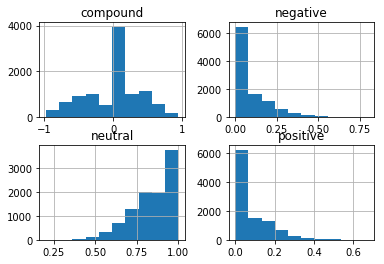

In [45]:
print (df1.hist())

It can be observed that maximum amount of statements are neutral as its compound value is 0, negative is 0, positive is 0 and neutral is 1.

In [46]:
neg = df['negative']
neu =df['neutral']
comp = df['compound']
pos =df['positive'] 
print ("Attribute","Positive","Negative","Compound","Neutral" )
print ("Max: \t", "{0:.2f} \t".format(pos.max()), "{0:.2f} \t".format(neg.max()), "{0:.2f}\t".format(comp.max()), "{0:.2f}\t".format(neu.max()))
print ("Min: \t", "{0:.2f} \t".format(pos.min()), "{0:.2f} \t".format(neg.min()), "{0:.2f}\t".format(comp.min()), "{0:.2f}\t".format(neu.min()))
print ("Avg: \t", "{0:.2f} \t".format(pos.mean()),"{0:.2f} \t".format(neg.mean()),"{0:.2f}\t".format(comp.mean()),"{0:.2f}\t".format(neu.mean()))
print ("Std.Devi", "{0:.2f} \t".format(pos.std()),  "{0:.2f} \t".format(neg.std()), "{0:.2f}\t".format(comp.std()), "{0:.2f}\t".format(neu.std()))

Attribute Positive Negative Compound Neutral
Max: 	 0.67 	 0.80 	 0.94	 1.00	
Min: 	 0.00 	 0.00 	 -0.97	 0.20	
Avg: 	 0.07 	 0.08 	 -0.01	 0.85	
Std.Devi 0.10 	 0.11 	 0.39	 0.14	


### Inference
-- Based on the information gained by skimming and scanning through different Fake news article and our dataset is that:
1. It can be said the statments which has the following sentiments are not fake news:
- compound = 0, 
- negative= 0, 
- positive = 0,
- neutral =  1

2. Fake news contains highly positve emotions or negative emotions.
Compound Score: The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 
- In our case we also have compound value. Negative emotions have compound value closure to -1 and positive have closure to 1.

#### Hence, we can conclude the below formula:
- if positive value is >0.75 or negative value is >0.75 or compound value is between (-0.75,0.75) can be suspected as fake news

In [52]:
### test function (non used)
value =0
for i in range(len(df)):
    if (df['negative'].iloc[i] > 0.75):
        if (df['compound'].iloc[i] < 0.75):
            value= 60*(df['negative'].iloc[i]+df['compound'].iloc[i])
            df['value'].iloc[i]=value
        else:
            value = 60* df['negative'].iloc[i]
            df['value'].iloc[i]=value
    elif (df['positive'].iloc[i]>0.75):
        if(df['compound'].iloc[i]>0.75):
            value= 40*(df['positive'].iloc[i]+df['compound'].iloc[i])
            df['value'].iloc[i]=value
        else:
            value = 40*df['positive'].iloc[i]
            df['value'].iloc[i]=value

/Users/vidhsharma/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [53]:
### main sensationalism function
def sentiment_sentationalism_scores(sentence):
    score = analyser.polarity_scores(sentence)
    final={}
    negative =score.get('neg')
    positive =score.get('pos')
    compund = score.get('compound')
    neutral =score.get('neu')
    final['negative'] = negative
    final['positive'] = positive
    final['compund'] = compund
    final ['neutral'] = neutral
    if (neutral == 1):
        value = 0
        
    elif (negative>0.7):
        value = negative
        
    elif (positive>0.7):
        value = positive
        
    elif ( neutral>0.65):
        value = (1-neutral)
        
    elif ( negative<0.7 and  positive<0.7 and (positive - negative>0)):
        value = (positive - negative)
        
    elif (  negative<0.7 and  positive<0.7 and  negative>0.4 and (positive - negative<0.5)  ):
        if(abs(compund)>negative):
            value = (1- abs(compund))
            
        else:
            value = (1- negative)
            
    else:
        value = abs(compund)
    final['sensationl_value'] = float('{:,.3f}'.format(value))
    #return final
    return value

In [49]:
sensational=[]
for i in df['statement']:
    result = (sentiment_sentationalism_scores(i))
    sensational.append(result)
    print (i)
    print (result)
    print ("")

Says the Annies List political group supports third-trimester abortions on demand.
0.30800000000000005

When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.
0.09799999999999998

Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
0.31299999999999994

Health care reform legislation is likely to mandate free sex change surgeries.
0.394

The economic turnaround started at the end of my term.
0

The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.
0.16400000000000003

Jim Dunnam has not lived in the district he represents for years now.
0

I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate.
0.126

However, it took $19.5 million in Oregon Lott

0.15100000000000002

Kim Myers voted repeatedly to raise taxes on the people of Broome County, but made millions off of tax savings when her family business relocated its headquarters.
0

Californias Prop 60, which would requirecondom usein adult films, would put workers in the adult film industry at riskfor lawsuits and harassment.
0.20299999999999996

We pay among the highest tolls in the nation for the privilege of crossing that bridge.
0.21799999999999997

Sens. Isaksons, Chambliss Votes Against Unemployment Insurance Were Votes to Kill Nearly 6,000 Georgia Jobs.
0.8225

Says real estate taxes were put in place to pay for Obamacare.
0.11299999999999999

Says today unemployment has been running near 12 percent or more for the last four years and the Legislature hasnt done much to lower it.
0.18100000000000005

Says Kay Bailey Hutchison voted for sanctuary cities.
0

John Mica voted to borrow $10 trillion.
0

Says opponent Mary Burke told reporters she would have required workers to 

Says Florida is a model for successful pretrial release programs.
0.32199999999999995

If you have ever visited Nashville or Washington D.C. you will see MANY names and initials carved into ... desks.
0

Redistribution has never been a characteristic of America.
0

Tampa is the strip club capital of the world.
0

Said they reached a power-sharing agreement with Republican Lt. Gov. Casey Cagle
0.33799999999999997

Says between 6 and 20 bicycles can be parked in the space required by one car.
0

I unsealed my records at Marquette University.
0

Says that U.S. Rep. Allen West is a constituent of mine.
0

The U.S. gives foreign aid to Cuba and Venezuela, even though those countries are our enemies.
0.17600000000000005

Says Texas wildfires are linked to climate change.
0

if the Agreement goes into effect, the millions of Mexican citizens who will become eligible for Social Security benefits may have a far stronger claim to benefits and protection against cuts than U.S. citizens!
0.268

Ea

0

Says Rep. Steve Stockman basically wants gun-filled zones in schools.
0

Says military expenditures for the United States are greater than the combined spending of the next 14 largest nations.
0.238

The Iran deal says that if any other country tries to undermine (Irans) nuclear program, we have to help them defend themselves against Israel, Egypt, Saudis, our own allies.
0.15400000000000003

Rick Scotts Administration spent over $100,000 of taxpayer money during their first voter purge attempt in 2012.
0

We are number one in the world when it comes to energy resources. ... The Russians are second; Saudi Arabia is number three.
0.18999999999999995

The Agriculture Department estimates that roughly 42 percent of the corn crop will be used to make ethanol -- more than the amount of corn used to feed livestock and poultry in the United States.
0.07599999999999996

In 1913, it was legal to mail children.
0.17600000000000005

Tonight in Ohio, more people came out to vote for Barack Obam


Health care reform "requires the use of federal dollars to fund abortions through the government-run health plan."
0.16700000000000004

A lot of what (Cubas) survival depends on is Venezuelan oil money, which is drying up.
0

The RI Board of Elections has heard official testimony from Providence residents who claim to have witnessed known illegal aliens voting in local elections.
0.135

Says Obama called Kagan a moderate. He called Sotomayor a moderate.
0

Today and every day, an estimated 14,000 Americans will lose their health insurance coverage.
0.17200000000000004

Darryl Hicks had seven ethics violations and didnt pay most of the fines.
0.29900000000000004

Since President Obama came into office, another 2 million Hispanics have joined the ranks of those in poverty. The number of Hispanic children living in poverty increased by 15 percent in that short period of time.
0.244

The top 1 percent in recent years has earned 85 percent of all new income.
0.122

Forty percent of the For

0.273

Says nearly 1 million people are coming to town in the next 20 years.
0

The House health care bill pays for "about six years of program with a decade of revenue, with the heaviest costs concentrated in the second five years."
0.11299999999999999

It's just outrageous that under President Bush, the National Institutes of Health have been basically decreased in funding.
0.15000000000000002

Kathryn Starkey joined forces with liberal Democrats on a historic sales tax hike.
0

Prices are going up. Unemployment is continuing to go up.
0.244

Says Texas has the nations most uninsured residents.
0

We are 49th in the nation for our graduation rate
0

Welcome to #Houston, the most #diverse city in #America.
0.273

The White House has three staff calligraphers making between $86,000 and $97,000 each, and just one National Security Director. She makes $55,000.
0.10299999999999998

Says Maggie Hassan is the only female governor in the country.
0

Thomas Paine wrote that the duty of a patr

0

A North Carolina study proves that probably over a million people voted twice in (the 2012) election.
0

Tarpon Springs takes its homeless to St. Petersburg.
0

The overall fact about illegal immigration is that its not actually getting worse.
0.2607

Says Hillary Clinton has been in office and in government longer than anybody else running here tonight.
0

More people are apprehended after illegally crossing the U.S.-Mexico border a week than are born in Texas each week.
0

For more than 30 years after World War II, there was a steady reduction in U.S. debt as a percentage of gross domestic product.
0.33299999999999996

While I was working on those streets watching those folks see their jobs shift overseas, you were a corporate lawyer sitting on the board at Wal-Mart.
0

The United States sends $300 billion -- half our trade deficit -- overseas for oil to unstable and unfriendly regimes.
0.5994

Our population has grown from about 1 million in the 1970s to almost 7 million today.
0

Says he lived in a colonia while working as a farm worker.
0

Over the last 40 years, this countrys prison population has grown by 500 percent.
0.20199999999999996

While President Obama says all options are on the table for preventing a nuclear Iran, Hagel says military action is not a viable, feasible, responsible option.
0.122

Bernie Sanderss plan is to raise your taxes to 90 percent.
0

Says Russ Feingold broke his 1992 promise to always get the majority of funding from Wisconsin residents.
0.254

Even our attorney general who is a strong Democrat, she has said that we need causation in our workers comp system. Thats the No. 1 thing pushing our manufacturing jobs out of Illinois.
0.15900000000000003

We dont have bridges being built in the United States.
0.237

More money is dedicated within the Department of Homeland Security to climate change than whats spent combating Islamist terrorists radicalizing over the Internet in the United States of America.
0.33399999999999996

Says P

There is debate among constitutional scholars about whether the First Amendment will continue to protect faith leaders from being forced to perform marriages against their religious beliefs.
0.259

Last year, American oil production reached its highest level since 2003.
0.123

The head of the FBI has told Congress they cannot vet those (Syrian) refugees.
0

[Eighty-five percent] of the funds collected in each county will be redistributed elsewhere -- not spent in the county in which it is collected.
0

Weve rebuilt China.
0

Say the ratio of CEO pay to average worker pay in the U.S. is 475 to 1.
0.15700000000000003

In the year 2013, the Obama administration released 104,000 criminal illegal aliens. They released 196 murderers people with homicide convictions, who are here illegally.
0.9062

More than 100,000 women in Texas have attempted to self-induce abortion in the past year alone.
0.118

Says Missouri families earning power is about $5,000 less today than it was at the turn of the

0.07699999999999996

$6 billion water bond program voters passed in 2011 has yet to be tapped.
0

Says about 100,000 kids in this country leave their home state and go to another state to be educated. Out of that 100,000 young people, 30,000 of them are from New Jersey, by far the largest amount.
0.03200000000000003

(Obama) did accept donations from lobbyists and PACs and he spent money in this campaign from that, through his political action committee.
0.10999999999999999

Says Rick Scott gave a deposition in which he invoked the Fifth Amendment 75 times about his dealings as head of Columbia/HCA hospital chain
0

Immigrants have captured all of the nearly 9 million jobs created since 2000.
0.15400000000000003

The world food demand is going to double sometime between now and 2070.
0.11099999999999999

Alabamians havent changed their opinion on same-sex marriage since voting to ban it in 2006.
0.20499999999999996

All (Maryland) crabs are born in Virginia.
0

Says U.S. Sen. Ron Johns


Says President Barack Obama initially said the national health-care mandate isnt a tax, but his administration now says it is a tax.
0

There are still more people uninsured today than when Obama was elected president.
0

The federal government owns tens of thousands of properties that are vacant or underused.
0

Says her representation of an ex-boyfriend who was then my friend in a family law case is something that lawyers do on a regular basis.
0.127

You dont know if this (the H1N1 vaccine) is gonna cause neurological damage like it did in the 1970s.
0.251

You cant pass a budget in the Senate of the United States without 60 votes.
0.17700000000000005

Hillary Clinton advocates "a freeze on foreclosures. Barack Obama said no."
0.33799999999999997

Our pension system is the only one in the country thats 100 percent funded.
0

We have the lowest percentage of Americans working today of any year since 1977.
0.16700000000000004

In 2010, everybody said you cant dare let guns go into th

0.18200000000000005

Tim Kaine supported higher energy costs for families.
0.423

Ending federal funding for National Public Radio would jeopardize 9,000 jobs.
0

Says Florida refused to allow theinsurance commissioner to negotiate lower rates with companies or refuse rates that are too high under Obamacare.
0.32099999999999995

Rick Scott has said that he would do away with the Department of Community Affairs.
0

Oregons Umpqua Community College where the shooting occurred was a gun-free zone.
0

As a result of National Rifle Association and other private-sector (safety-education) programs, fatal firearms accidents are at the lowest level in 100 years.
0.30700000000000005

Georgias CRCT set some of the lowest expectations for student proficiency in the nation.
0.16700000000000004

He's been endorsed by "every major newspaper here in the state of Texas."
0.14300000000000002

The House of Representatives does not have a prochoice majority.
0

Romney outsourced call center jobs to India.

0.09499999999999997

Of the 13 (Bill) Clinton speeches that fetched $500,000 or more, only two occurred during the years his wife was not secretary of state.
0

When (Barack Obama) took office, 2.3 million people were out of work. Five-plus years later, we have 5 million-plus out of work.
0

Says in January 1992, George H. W. Bush probably had a 90 percent or even higher approval rating after the first Gulf War.
0.259

When LBJ started#WarOnPoverty, 14% of Americans lived in poverty. 50 yrs later, 14% still do. Theres a #BetterWay.
0.17100000000000004

[Mitt] Romney and [Brendan] Doherty certainly have a lot in common, like flip-flopping on abortion -- in Dohertys case, in a little over a week.
0.19699999999999995

Our reserves are now in much better shape than they were just a few years ago.
0.17200000000000004

Says no city comparable in size to Austin or smaller was broken into as many congressional districts.
0.261

In 32 other states and Washington D.C., they [voters] can avoid th

Says Colorado congressional candidate Morgan Carroll voted to allow welfare recipients to use your tax dollars at ATMs at strip clubs and pot dispensaries.
0.07599999999999996

Georgia has the most restrictive ballot access laws in the country.	elections	mary-n			independent	0	0	0	0	0	a television interview
3666.json	false	On whether the federal debt limit should be raised	federal-budget	barack-obama	President	Illinois	democrat	70	71	160	163	9	an interview with George Stephanopoulos
4608.json	half-true	When George W. Bush was governor of Texas, the percentage uninsured went down. Under his successor, Rick Perry, its gone up.	children,health-care,new-hampshire-2012	mitt-romney	Former governor	Massachusetts	republican	34	32	58	33	19	a Republicam debate in Hanover, N.H.
11023.json	false	Says his book,The Art of the Deal,is the No. 1 selling business book of all time.	candidates-biography,job-accomplishments	donald-trump	President-Elect	New York	republican	63	114	51	37	61	remarks on CNN.
2

More than three women per day lose their lives at the hands of their partners.
0.16200000000000003

Ninety percent of people living in Gaza dont have access even to water.
0

Says Barack Obama said that ordinary men and women are too small-minded to govern their own affairs and that individuals should surrender their rights to an all-powerful sovereign.
0

Promotes a chart saying that Barack Obama has increased the debt by 16 percent, compared to George W. Bush, who increased it by 115 percent.
0.31299999999999994

Says a man in Ferguson, Mo., was photographed holding a sign that said, No mother should have to fear for her sons life every time he robs a store.
0.268

Says Hillary Clinton went toe-to-toe with Russia as secretary of state to do the New START agreement to reduce Russias nuclear stockpile.
0.132

America has lost nearlyone third of its manufacturing jobs since 1997, following the enactment of disastrous trade deals supported by Bill and Hillary Clinton.
0.28800000000000003


The Federal Reserve system has presided over about a 95... percent decline in the U.S. dollar.
0

Numbers on illegal immigrants "are down in terms of apprehensions, which indicates fewer illegal crossings, but also up in terms of actual enforcement actions."
0.22399999999999998

Says Gov. Scott Walker hasnt done a public event this entire year.
0

Obama "wants a windfall profits tax on oil to go along with the new taxes he also plans for coal and natural gas."
0.21299999999999997

If you will go look up the definition of act of God, weve used it in legal terms for a long time in this state.
0.14100000000000001

Monarch butterflies are becoming extinct because of increased use of crops genetically modified to withstand pesticides.
0.123

President Obama gave Egypts Muslim Brotherhood one and a half billion dollars.
0

Says Donald Trump promised to take care of everybody (through government-run healthcare and) the governments going to pay for it.
0.29500000000000004

Says professional f


Laurie Monnes Anderson voted to let violent criminals out of jail early.
0.1775

Republicans would give seniors a (Medicare) voucher that limits whats covered, costing seniors as much as $6,400 more a year.
0

Donald Trump is appealing as much to Democrats as he is to Republicans.
0

For people in the top 1 percent for income, your effective tax burden is in the low 20s, the lowest its been in decades and decades and decades -- lower than somebody who might make substantially less money.
0.32199999999999995

Ninety-five percent of Oregonians now have health insurance coverage, tens of thousands for the very first time.
0

Former business partner Robert Gay says: The man who helped save my daughter was Mitt Romney.
0.17600000000000005

The sales tax increase, if approved, will cost taxpayers up to $300 million per year, in perpetuity, to finance a rail system for the City of Tampa.
0.17500000000000004

Among the developed nations, we are the least economically and socially mobile count

0.139

If you are African-American in this country today, you are likely to have a net worth of about 10 percent of what white families have.
0.07599999999999996

Closing the tobacco loophole would save Missouri taxpayers $50,000,000
0.28600000000000003

Says Vladimir Putin once said, The breakup of the Soviet Union was the greatest geopolitical tragedy of the 20th century.
0.32299999999999995

Says Washingtons reach extends to even telling us what kind of light bulb we can use.
0.15700000000000003

Health care premiums up 90 percent in New Hampshire.
0.28600000000000003

House Speaker Dean Cannon says that freshmen lawmakers account for one-third of the 120-member House, and that two-thirds of the chamber have two years or less experience.
0

The United States has the best health care delivery system in the world.
0.505

There are billions of barrels of oil beneath our oceans and in Alaska, and there is ample oil shale in the Rocky Mountain West, but Democrats "say all this American e

0.7964

[U]nlike every other major transit system in the nation, MARTA has never received any significant, dedicated funding from the state of Georgia.
0.18700000000000006

John Kerry was at 4 percent in the polls in December of 2003...and he ended up becoming the nominee of the party.
0.119

A federal judge said President Barack Obamas executive action on immigration is unconstitutional.
0

At $587 apiece, USA would need to bring home about 33.1 BILLION gold medals to pay off our national debt.
0.17800000000000005

In other states (where illegal immigrants have been allowed to get drivers licenses) their insurance premiums for everybody have gone down.
0.15300000000000002

I want to freeze interest rates for five years.
0.524

Two elections in a row (Waukesha County Clerk Kathy Nickolaus) has screwed up counting the vote
0.18600000000000005

The Georgia Department of Economic Development assisted with the creation of 28,776 jobs, an increase of 29 percent from last fiscal year, and $5

So that 2005 energy bill was a big step backwards on the path to clean, renewable energy. That's why I voted against it.
0.29200000000000004

There are 500 registered Republicans moving to Texas every day.
0

Says an arts tax would provide funding for certified arts and music teachers for every elementary school serving Portland residents.
0

Every year the average woman loses around $11,000 to the wage gap, which amounts to a $500,000 vagina tax over her working career.
0.09899999999999998

Says abortions are decreasing.
0

Abraham Lincoln (once) jumped out of a window in the Illinois Legislature in order to deny a quorum.
0.138

Those who fail to buy health insurance under Obamacare face the threat of jail time.
0.347

Since December 2010 Florida has created 540,000 new jobs.
0.19999999999999996

People who wash cars at home will use approximately 80 percent more water than they do in a car wash.
0

The U.S. Court of Appeals for the Fourth Circuit compared the health care law to buyi

Says Rep.Mike Coffman istheone who said he would support Trump.
0.23099999999999998

According to the Congressional Budget Office, repealing Obamacare would increase the budget deficit.
0.31200000000000006

Today New Mexico (has) the sixth-fastest growing economy.
0.19499999999999995

The Texas leg of the Keystone pipeline has already created 4,800 jobs in just the year its been up and running.
0.09099999999999997

A third of the budget for the city of Ferguson (Missouri) was being reaped by civil fines.
0

Says 25 percent of Austins public school buildings are underutilized.
0

McCain opposed the border fence.
0

SaysLoretta Lynchs nomination has been now sitting there longer than the previous seven attorney general nominees combined.
0

I had previously said that NATO was obsolete because it failed to deal adequately with terrorism. Since my comments, they have changed their policy and now have a new division focused on terror threats.
0.9287

Taxpayer money will provide iPod Touch d


Jasper County in Texas raised property taxes by 7 percent in order to pay for one death penalty case.
0.8074

The Clinton camp was the first to get it out there and try to say there was something untoward about the speech that Melania Trump gave.
0

Says that voter identification laws keep poor people from voting, minorities from voting, the elderly from voting, students from voting.
0.14

Nearly 65 percent -- almost two-thirds -- of all new permanent residents obtained that status by virtue of their family status.
0.123

Says that politicians who approved collective bargaining restrictions for public employees exploited a loophole exempting themselves from Senate Bill 5.
0.254

Its a good sign for Obamacare that in California, the proportion of kids who are signing up is the proportion of kids in the population.
0.11199999999999999

Wisconsin is the only state that allows parents or guardians to purchase alcohol for their children regardless of whether that child is seven or 20 years

(array([4225., 2725., 2035.,  865.,  134.,   56.,   53.,   47.,   69.,
          31.]),
 array([0.     , 0.09633, 0.19266, 0.28899, 0.38532, 0.48165, 0.57798,
        0.67431, 0.77064, 0.86697, 0.9633 ]),
 <a list of 10 Patch objects>)

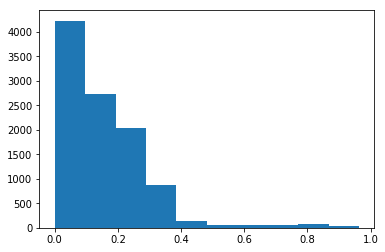

In [50]:
plt.hist(sensational)

In [51]:
test = sentiment_sentationalism_scores('It was under Barack Obama and Hillary Clinton that changed the rules of engagement that probably cost (Capt. Humayun Khans) life.')
print (test)

0.13


##  Applying sensationalism function on testing dataset

In [54]:
dfTest =pd.read_csv('../liar-liar_dataset/test.tsv', sep='\t')

In [55]:
dfTest.head(10)

file        value                                          statement  \
0  11972.json         TRUE  Building a wall on the U.S.-Mexico border will...   
1  11685.json        FALSE  Wisconsin is on pace to double the number of l...   
2  11096.json        FALSE  Says John McCain has done nothing to help the ...   
3   5209.json    half-true  Suzanne Bonamici supports a plan that will cut...   
4   9524.json   pants-fire  When asked by a reporter whether hes at the ce...   
5   5962.json         TRUE  Over the past five years the federal governmen...   
6   7070.json         TRUE  Says that Tennessee law requires that schools ...   
7   1046.json  barely-true  Says Vice President Joe Biden "admits that the...   
8  12849.json         TRUE  Donald Trump is against marriage equality. He ...   
9  13270.json  barely-true  We know that more than half of Hillary Clinton...   

                                               topic  \
0                                        immigration   
1                                               jobs   
2                    military,veterans,voting-record   
3  medicare,message-machine-2012,campaign-adverti...   
4  campaign-finance,legal-issues,campaign-adverti...   
5                 federal-budget,pensions,retirement   
6    county-budget,county-government,education,taxes   
7                                   economy,stimulus   
8                         gays-and-lesbians,marriage   
9                                     foreign-policy   

                               name  \
0                        rick-perry   
1                 katrina-shankland   
2                      donald-trump   
3                     rob-cornilles   
4  state-democratic-party-wisconsin   
5                   brendan-doherty   
6          stand-children-tennessee   
7                      john-boehner   
8              sean-patrick-maloney   
9                        mike-pence   

                                   occupation         state       party  \
0                                    Governor         Texas  republican   
1                        State representative     Wisconsin    democrat   
2                             President-Elect      New York  republican   
3                                  consultant        Oregon  republican   
4                                         NaN     Wisconsin    democrat   
5                                         NaN  Rhode Island  republican   
6  Child and education advocacy organization.     Tennessee        none   
7     Speaker of the House of Representatives          Ohio  republican   
8                       Congressman for NY-18      New York    democrat   
9                                    Governor       Indiana  republican   

   barely true counts  false counts  half true counts  mostly true counts  \
0                  30            30                42                  23   
1                   2             1                 0                   0   
2                  63           114                51                  37   
3                   1             1                 3                   1   
4                   5             7                 2                   2   
5                   1             2                 1                   1   
6                   0             0                 0                   0   
7                  13            22                11                   4   
8                   0             0                 0                   0   
9                   8            10                12                   5   

   pants on fire counts                                        context   
0                    18                                 Radio interview  
1                     0                               a news conference  
2                    61                    comments on ABC's This Week.  
3                     1                                    a radio show  
4                     7   

In [57]:
dfTest['statement'].head(10)

0    Building a wall on the U.S.-Mexico border will...
1    Wisconsin is on pace to double the number of l...
2    Says John McCain has done nothing to help the ...
3    Suzanne Bonamici supports a plan that will cut...
4    When asked by a reporter whether hes at the ce...
5    Over the past five years the federal governmen...
6    Says that Tennessee law requires that schools ...
7    Says Vice President Joe Biden "admits that the...
8    Donald Trump is against marriage equality. He ...
9    We know that more than half of Hillary Clinton...
Name: statement, dtype: object

In [58]:
polarityTest=[]
for i in dfTest['statement']:
    result = (sentiment_sentationalism_scores(i))
    polarityTest.append(result)
    print (i)
    print (result)
    print ("")

Building a wall on the U.S.-Mexico border will take literally years.
0

Wisconsin is on pace to double the number of layoffs this year.
0.10599999999999998

Says John McCain has done nothing to help the vets.
0.20099999999999996

Suzanne Bonamici supports a plan that will cut choice for Medicare Advantage seniors.
0.15299999999999997

When asked by a reporter whether hes at the center of a criminal scheme to violate campaign laws, Gov. Scott Walker nodded yes.
0.34099999999999997

Over the past five years the federal government has paid out $601 million in retirement and disability benefits to deceased former federal employees.
0.10599999999999998

Says that Tennessee law requires that schools receive half of proceeds -- $31 million per year -- from a half-cent increase in the Shelby County sales tax.
0.08399999999999996

Says Vice President Joe Biden "admits that the American people are being scammed" with the economic stimulus package.
0.11499999999999999

Donald Trump is against mar


Says Barack Obamas comments indicate he believes in redistribution of wealth.
0.242

Says of the 2,000 Portland households in the year-long (composting) pilot, 87 percent of participants reported being satisfied with the overall system.
0.118

Says Oregon state employees received a catch-up pay raise in 1981 -- just two years after they agreed not to take a raise in exchange for a retirement benefit.
0.21999999999999997

Here in Pennsylvania, the annual cost for infant childcare is over $10,000 per child, which is more than most families pay in rent and almost the same cost as in-state college tuition.
0.051000000000000045

All of Texas is conservative, except a little bit of Austin.
0

Under this tax cut, middle-class families dont save enough for a weeks worth of groceries, while millionaires save enough to go on an exotic vacation.
0.31599999999999995

The poverty rate amongst women is the worst its been in 17 years and the extreme poverty rate is the worst its ever been.
0.0586999


According to independent analysis, unfair trade deals have resulted in the loss of over 64,000 jobs in Wisconsin ... But Ron Johnson favors those deals.
0.21999999999999997

Ohio currently ranks 50th out of all states in income growth.
0.20599999999999996

We knew Strom Thurmond had proposed the amendment that blocked Puerto Ricos use of Chapter 9 bankruptcy protection.
0.11599999999999999

In the four years before I became governor, we increased state debt $5.2 billion. Weve paid it down $2 billion.
0.21299999999999997

Says they said it was impossible to balance a budget at the same time, with an $11 billion deficit and we did it.
0.11399999999999999

Says Bruce Starr broke the law by letting lobbyists wine and dine him in Maui.
0.16700000000000004

Latina who enthusiastically supported Donald Trump on stage in Las Vegas in October 2015 has been deported.
0.28200000000000003

John McCain is right on that one. The line-item veto is the best tool the president has to rein in excessive

Says Thom Tillis gives tax breaks to yacht and jet owners.
0

During his time as House speaker, unemployment came down from 5.6 percent to under 4 (percent).
0.17200000000000004

Obamacare was the Republican plan in the early 90s.
0

We had an amendment in the health care law that said the federal government is going to take over education.
0.14400000000000002

(Assembly Democrats) wanted to raise the gas tax by $2.4 billion. We said no to that....Theyre down on the ground. Theyre sweating. Theyre twitching. Its ugly, cause I keep saying no.
0.22199999999999998

Says he turned down a Medicaid expansion under Obamacare, but because of actions he took, for the first time in Wisconsins history everyone living in poverty is covered under Medicaid.
0.137

Says Patrick Murphy switched his vote on All Aboard Florida ... because his father tried to get in a bid to build it and was unsuccessful.
0.135

Says U.S. Sen Sherrod Brown promised that the first stimulus bill would fund the Brent Spence

(array([494., 335., 267., 122.,  18.,  10.,   5.,   5.,   5.,   6.]),
 array([0.     , 0.09451, 0.18902, 0.28353, 0.37804, 0.47255, 0.56706,
        0.66157, 0.75608, 0.85059, 0.9451 ]),
 <a list of 10 Patch objects>)

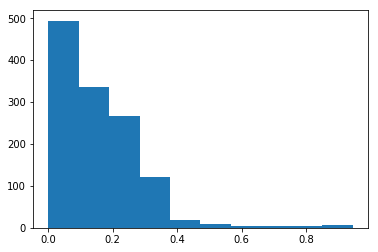

In [65]:
plt.hist(polarityTest)